<font size=6><b>lec06. 이진분류 - 평가 메트릭스

<img src="./imgs/lec06.png">
* ref : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [111]:
# 모델 학습 import

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [65]:
# 모델 평가 import

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.preprocessing import Binarizer

# Data Load

In [2]:
df = pd.read_csv("./datasets/diabetes.csv")
df.rename(columns={"Outcome" : "target"},  inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# from sklearn.datasets import load_diabetes
# dataset = load_diabetes()
# print( dataset.keys() )
# # -----------------------------------------
# df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
# df['target'] = dataset['target']
# df.head()

# 샘플 가져오기

## 샘플링(N개)

In [5]:
df[df['target']==1].sample(n=3, random_state = 21)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
706,10,115,0,0,0,0.0,0.261,30,1
561,0,198,66,32,274,41.3,0.502,28,1
25,10,125,70,26,115,31.1,0.205,41,1


## 샘플링(N%)

In [6]:
dfs = df.sample(frac=0.1, random_state=21)

print( dfs.shape )
dfs['target'].value_counts()

(77, 9)


0    47
1    30
Name: target, dtype: int64

In [114]:
dfs.to_dict()

{'Pregnancies': {93: 4,
  42: 7,
  194: 8,
  130: 4,
  676: 9,
  563: 6,
  331: 2,
  500: 2,
  119: 4,
  467: 0,
  77: 5,
  538: 0,
  104: 2,
  713: 0,
  520: 2,
  453: 2,
  456: 1,
  397: 0,
  165: 6,
  761: 9,
  142: 2,
  575: 1,
  247: 0,
  22: 7,
  595: 0,
  528: 0,
  476: 2,
  284: 2,
  71: 5,
  211: 0,
  659: 3,
  485: 0,
  572: 3,
  269: 2,
  599: 1,
  123: 5,
  255: 1,
  277: 0,
  149: 2,
  747: 1,
  534: 1,
  641: 4,
  156: 2,
  634: 10,
  209: 7,
  635: 13,
  697: 0,
  380: 1,
  552: 6,
  670: 6,
  317: 3,
  292: 2,
  435: 0,
  710: 3,
  393: 4,
  756: 7,
  19: 1,
  234: 3,
  460: 9,
  422: 0,
  663: 9,
  126: 3,
  353: 1,
  4: 0,
  308: 0,
  70: 2,
  587: 6,
  131: 9,
  628: 5,
  406: 4,
  604: 4,
  110: 3,
  466: 0,
  276: 7,
  9: 8,
  383: 1,
  439: 6},
 'Glucose': {93: 134,
  42: 106,
  194: 85,
  130: 173,
  676: 156,
  563: 99,
  331: 87,
  500: 117,
  119: 99,
  467: 97,
  77: 95,
  538: 127,
  104: 85,
  713: 134,
  520: 68,
  453: 119,
  456: 135,
  397: 131,
  165: 

In [8]:
df = pd.DataFrame(dfs)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
93,4,134,72,0,0,23.8,0.277,60,1
42,7,106,92,18,0,22.7,0.235,48,0
194,8,85,55,20,0,24.4,0.136,42,0
130,4,173,70,14,168,29.7,0.361,33,1
676,9,156,86,0,0,24.8,0.230,53,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 93 to 439
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               77 non-null     int64  
 1   Glucose                   77 non-null     int64  
 2   BloodPressure             77 non-null     int64  
 3   SkinThickness             77 non-null     int64  
 4   Insulin                   77 non-null     int64  
 5   BMI                       77 non-null     float64
 6   DiabetesPedigreeFunction  77 non-null     float64
 7   Age                       77 non-null     int64  
 8   target                    77 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 6.0 KB


# EDA

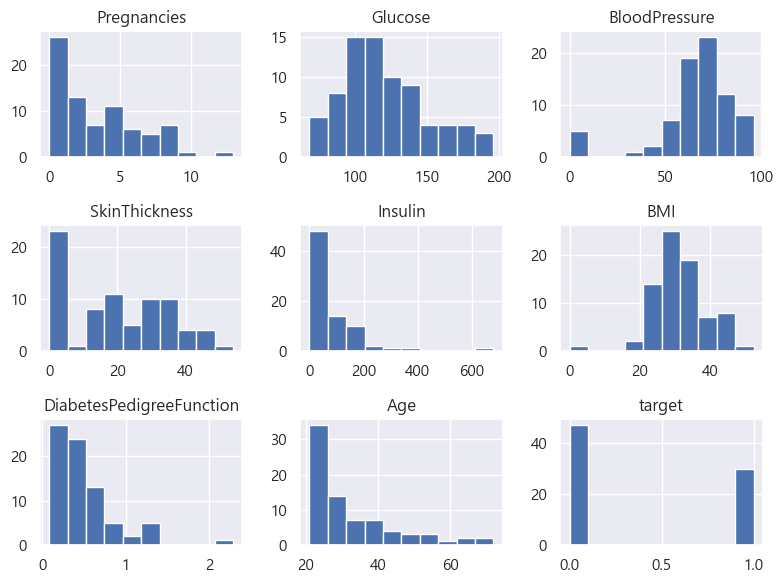

In [10]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

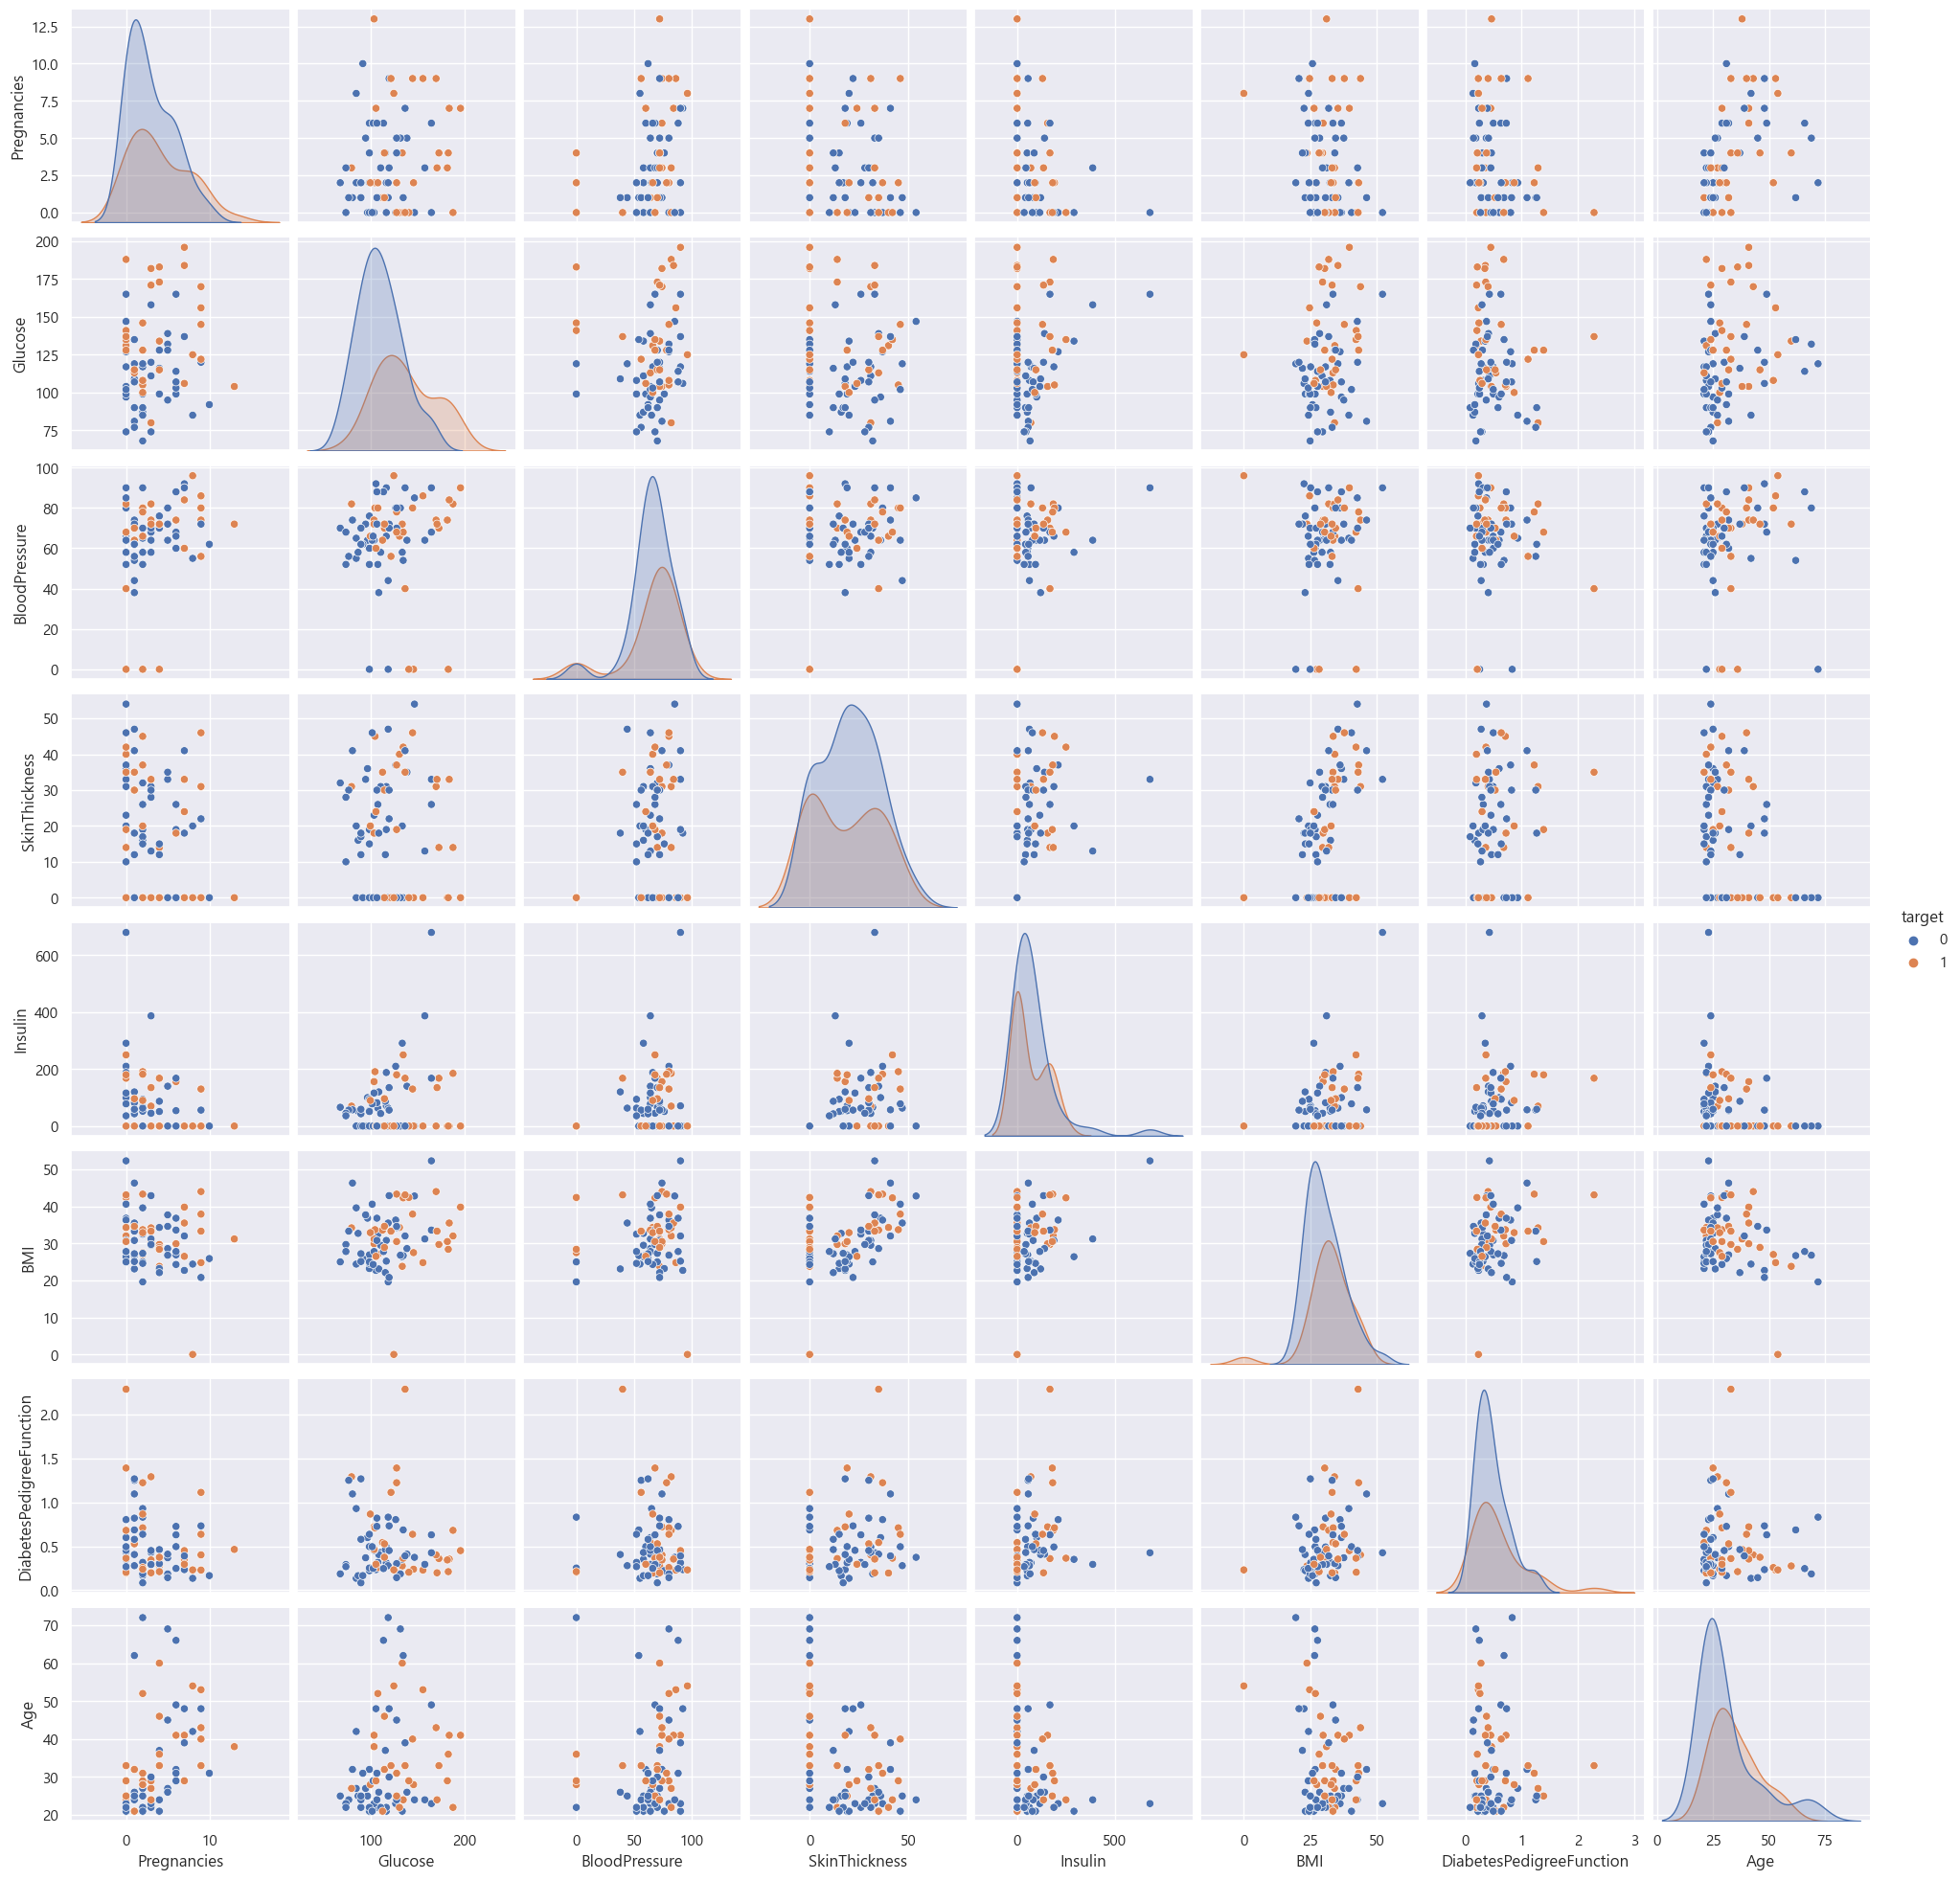

In [11]:
sns.pairplot(data=df , hue='target')
plt.show()

# 학습 & 평가

## train test 분리

In [13]:
y = df['target']
X = df.drop(['target'],  axis=1)
print(X.shape, y.shape)

(77, 8) (77,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=1111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((61, 8), (16, 8), (61,), (16,))

In [15]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
pred  = model.predict(X_test)
proba = model.predict_proba(X_test)
df_var = model.decision_function(X_test)


print(f"y_test : {y_test}")
print(f"pred : {pred}")
print(f"proba : {proba}")

print(f"argmax : {np.argmax(np.array([9.99948061e-01, 5.19390480e-05]))}")
print(f"df_var : {df_var}")

accuracy = accuracy_score(y_test, pred)
print(f"accuracy : {accuracy:.5f}")

y_test : 123    0
142    0
4      1
130    1
710    0
520    0
453    0
485    1
156    0
149    0
572    0
284    1
635    1
676    1
528    0
234    0
Name: target, dtype: int64
pred : [0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0]
proba : [[0.60362955 0.39637045]
 [0.76140324 0.23859676]
 [0.11210151 0.88789849]
 [0.23372575 0.76627425]
 [0.61076271 0.38923729]
 [0.96049792 0.03950208]
 [0.37029731 0.62970269]
 [0.73116159 0.26883841]
 [0.77442666 0.22557334]
 [0.89551732 0.10448268]
 [0.67971892 0.32028108]
 [0.8114564  0.1885436 ]
 [0.67103632 0.32896368]
 [0.27763454 0.72236546]
 [0.77861315 0.22138685]
 [0.93679103 0.06320897]]
argmax : 0
df_var : [-0.42061144 -1.16038817  2.0694526   1.18739169 -0.45051937 -3.19109856
  0.53094155 -1.00052399 -1.23347764 -2.14838027 -0.75248038 -1.4595014
 -0.71287593  0.95622553 -1.25760267 -2.69601408]
accuracy : 0.75000


In [16]:
proba_df = pd.DataFrame(proba)
proba_df['pred']=pred
proba_df.head()

,0,1,pred
0,0.603630,0.396370,0
1,0.761403,0.238597,0
2,0.112102,0.887898,1
3,0.233726,0.766274,1
4,0.610763,0.389237,0


https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack

## 참고(np.column_stack)


<img src ='https://i.stack.imgur.com/1QBr4.png'>

* 판별함수(해당 기준값으로 0,1을 판별한다. 머신러닝에서는 proba값을 기준으로 판별하고 있다.)
    * 기준값(threshold)>0 : 양성(Positive)
    * 기준값(threshold)<0 : 음성(negative)
    * 기준값(threshold)을 얼마로 설정하냐에 따라 성능평가 점수가 달라진다

In [17]:
pd.DataFrame(np.vstack([y_test, pred, proba[:,0], proba[:,1], df_var]).T, columns = ['y_test','pred','proba0','proba1','desc.func'])

,y_test,pred,proba0,proba1,desc.func
0,0.0,0.0,0.603630,0.396370,-0.420611
1,0.0,0.0,0.761403,0.238597,-1.160388
2,1.0,1.0,0.112102,0.887898,2.069453
3,1.0,1.0,0.233726,0.766274,1.187392
4,0.0,0.0,0.610763,0.389237,-0.450519
5,0.0,0.0,0.960498,0.039502,-3.191099
6,0.0,1.0,0.370297,0.629703,0.530942
7,1.0,0.0,0.731162,0.268838,-1.000524
8,0.0,0.0,0.774427,0.225573,-1.233478
9,0.0,0.0,0.895517,0.104483,-2.148380


## 판별 분석(통계 개념)

    https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gkenq&logNo=10188802783
    - 샘플을 이용해서 모집단의 어느 집단인지를 판별하는 분석
    - 통계의 모수 : 평균, 분산

### 판별 변수(Feature importance)

    - 독립변수 중 판별력이 높은 변수(중요 가중치 가진 피쳐)

### 판별 함수(Decision function)

    - 종속변수의 집단을 정확하게 분류할 수 있는 예측력 높이는 함수
    - 판별 변수를 판별 함수에 대입했을 때, 적합한 기울기 찾기? 회귀선 찾아내기.
    - 전체 표본의 크기는 독립 변수의 2-3배는 되어야 분석이 가능하다.

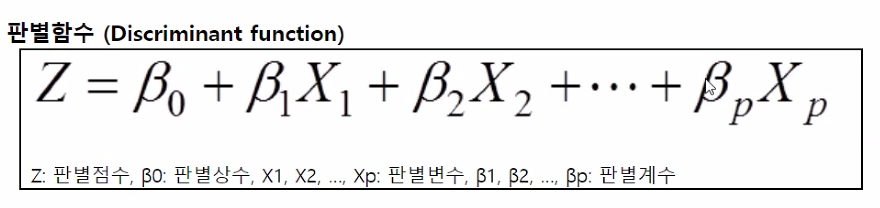

* 판별함수에 사용되는 변수는 판단의 방향을 의미하는 변수이기 때문에, 변수값이 제한적이거나 2개정도여야 한다.

In [18]:
proba_df = pd.DataFrame(proba)
proba_df['pred'] = pred
proba_df.head(5)

,0,1,pred
0,0.603630,0.396370,0
1,0.761403,0.238597,0
2,0.112102,0.887898,1
3,0.233726,0.766274,1
4,0.610763,0.389237,0


## 피쳐 중요도 

### LogisticRegression(모 아니면 도)

In [37]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
pred  = model.predict(X_test)
proba = model.predict_proba(X_test)
df_var = model.decision_function(X_test)

#### coef_

    - LinearRegression은 사이킷런의 선형회귀 클래스이다.
    학습된 모델의 coef_ 속성은 특성에 대한 계수를 포함한 배열이다. 즉 이 배열의 크기는 특성의 개수와 같다.

[[ 0.05093695  0.04444868 -0.0098315   0.00467254 -0.00419985 -0.01222276
   1.27487174 -0.00529812]]


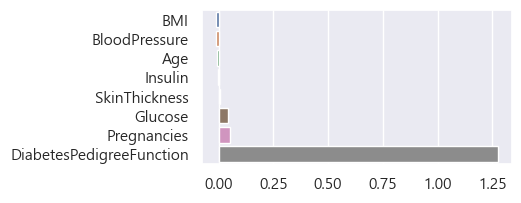

In [38]:
print( model.coef_ )
plt.figure(figsize=(4,2))
s = pd.Series(model.coef_.reshape(-1), index=X_train.columns).sort_values()
sns.barplot(x=s.values, y=s.index)
plt.show()

### DecisionTreeClassifier(결정트리)

In [33]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
pred  = model.predict(X_test)
proba = model.predict_proba(X_test)

[0.         0.42200981 0.08025168 0.02862237 0.04246519 0.08995603
 0.18016261 0.15653231]


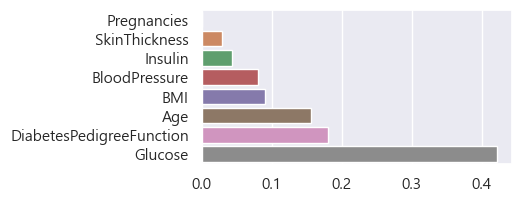

In [34]:
print( model.feature_importances_ )
plt.figure(figsize=(4,2))
s = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
sns.barplot(x=s.values, y=s.index)
plt.show()

In [39]:
confusion_matrix(y_test, pred)

array([[9, 1],
       [3, 3]], dtype=int64)

# 평가 매트릭스

## 혼동 매트릭스

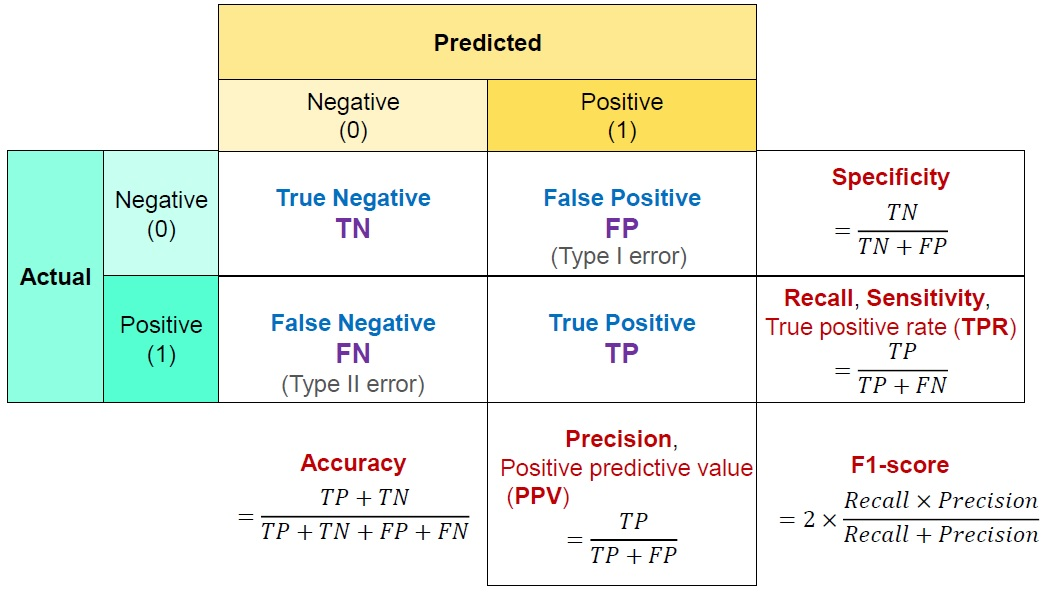

* **TPR(재현율) : 실제 positive 중의 예측 positive 비율 (실제 범죄자를 예측이 범죄자라고 했나?)**
    - 실제 암인데, 예측을 암이 아니라고 하면 안된다. FN이 중요함
    - 잘 맞춘다 : 양성(1)을 잘 맞추자. 양성(1)을 음성(0)이라고 예측하면 안되는게 중요하다.
    - 민감도 Sensitivity
    
    
<br>

* PPV(정밀도) : 예측 positivee 중의 실제 positive 비율 (예측이 범죄자인데 실제도 범죄자인가?)
    - 스팸메일이라고 예측했는데, 정상메일이어서 버려졌다. 중요메일이면? 문제가 크다.
    - 양성 예측도

<br>
* Accuracy : 맞은걸 맞다, 틀린걸 틀렸다 라고 하는 비율. 전체 중 모델이 정답을 맞춘 비율
<br>
<br>
* Type 1 error: 임신하지 않은 사람에게 '너는 임신이다' 라고 말함 (잘못된 인정) 

<br> 
* Type 2 error: 임신한 사람에게 '너는 임신이 아니다' 라고 말함 (잘못된 부정)


★ 정밀도와 재현율은 트레이드오프 관계이다.

<pre>
classification_report()
* <font color=red><b>accuracy
* <font color=red><b>f1, precision, recall (macro:산술평균,  micro:가중평균)
* <font color=red><b>roc_auc               (_ovr:멀티, _ovo:이진)
* <font color=red><b>neg_log_loss

## classification_report()

In [40]:
cr = classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.75      0.50      0.60         6

    accuracy                           0.75        16
   macro avg       0.75      0.70      0.71        16
weighted avg       0.75      0.75      0.74        16



In [41]:
accuracy  = accuracy_score(y_test, pred)
f1        = f1_score(y_test, pred, average='binary')
precision = precision_score(y_test, pred, average='binary')
recall    = recall_score(y_test, pred, average='binary')
# roc_auc   = roc_auc_score(y_test, pred, average='macro', multi_class="ovr")
print(f"accuracy:{accuracy:.5f} f1:{f1:.5}  precision: {precision:.5}  recall:{recall:.5}")  #   roc_auc:{roc_auc:.5}")

cm = confusion_matrix(y_test, pred)
print(cm)

accuracy:0.75000 f1:0.6  precision: 0.75  recall:0.5
[[9 1]
 [3 3]]


## Precision_recall_curve()

    sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)

### proba 양성(positive)확률만 계산

In [44]:
proba_c1 = proba[:,1] # 양성확률만 보고 싶을 때
proba_c1

array([0.39637045, 0.23859676, 0.88789849, 0.76627425, 0.38923729,
       0.03950208, 0.62970269, 0.26883841, 0.22557334, 0.10448268,
       0.32028108, 0.1885436 , 0.32896368, 0.72236546, 0.22138685,
       0.06320897])

(14,) (14,) (13,)


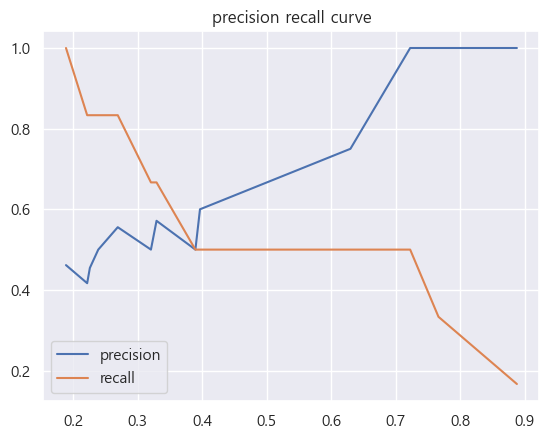

In [55]:
precision, recall, th = precision_recall_curve(y_test, proba_c1)

print(precision.shape, recall.shape, th.shape) # precision과 recall은 th(임계점)보다 +1로 return 한다.
#---------------------------------------------------------------


plt.plot(th, precision[:len(th)], label = 'precision')
plt.plot(th, recall[:len(th)], label = 'recall')

plt.legend()
plt.title('precision recall curve')
plt.show()

### 임계치(th) 조정

     -class sklearn.preprocessing.Binarizer(*, threshold=0.0, copy=True)[source]¶
     
     - Binarizer : 임계치(threshold=0.5)를 잡고 초과이면 1 , 그 이하면 0을 반환한다.

In [67]:

arr = np.array([0.7, 0.3, 0.5])

brz = Binarizer(threshold=0.5)
print(brz.fit_transform(arr.reshape(1,-1)))

brz = Binarizer(threshold=0.2)
print(brz.fit_transform(arr.reshape(1,-1)))

brz = Binarizer(threshold=0.8)
print(brz.fit_transform(arr.reshape(1,-1)))

[[1. 0. 0.]]
[[1. 1. 1.]]
[[0. 0. 0.]]


In [71]:
#proba 대입

print(proba_c1[:6])

brz = Binarizer(threshold=0.8)
print(brz.fit_transform(proba_c1.reshape(1,-1)))

brz = Binarizer(threshold=0.5)
print(brz.fit_transform(proba_c1.reshape(1,-1)))

[0.39637045 0.23859676 0.88789849 0.76627425 0.38923729 0.03950208]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


### 최적 값 찾기 위한 임계치 리스트 만들기

In [109]:

# macro 값 = 0.7이 가장 높다.

th_list = [0.25, 0.3, 0.35, 0.38, 0.40, 0.42, 0.45, 0.5, 0.6, 0.7]

for th in th_list :
    print('임계점 : ' ,th)
    brz = Binarizer(threshold=th)
    th_pred = brz.fit_transform(proba_c1.reshape(-1,1))
    print(confusion_matrix(y_test, th_pred))
    print(classification_report(y_test,th_pred))
    print('=='*30)

임계점 :  0.25
[[6 4]
 [1 5]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.56      0.83      0.67         6

    accuracy                           0.69        16
   macro avg       0.71      0.72      0.69        16
weighted avg       0.74      0.69      0.69        16

임계점 :  0.3
[[6 4]
 [2 4]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.50      0.67      0.57         6

    accuracy                           0.62        16
   macro avg       0.62      0.63      0.62        16
weighted avg       0.66      0.62      0.63        16

임계점 :  0.35
[[7 3]
 [3 3]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.50      0.50      0.50         6

    accuracy                           0.62        16
   macro avg       0.60      0.60      0.60     

## plot_precision_recall_curve()

    - 자동으로 플롯화해주는 함수

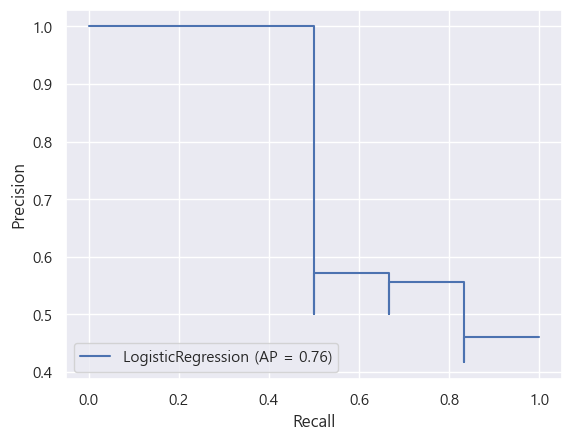

In [81]:
disp = plot_precision_recall_curve(model, X_test, y_test)


## ROC_AUC_Score(면적값)

    * AUC(Area Under Score) : roc 커브의 아래 면적 값

    - sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', 
        sample_weight=None, max_fpr=None, multi_class='raise', labels=None)[source]

In [86]:
auc_score = roc_auc_score(y_test, proba_c1)
print(f"AUC 점수 : {auc_score:.5f}")

AUC 점수 : 0.76667


In [97]:
from sklearn.metrics import auc

#커브가 던져주는 값을 이용해서 점수를 내는

In [98]:
auc_score = auc(fpr, tpr)
auc_score

0.7666666666666667

## ROC_curve()

    - sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

In [95]:
fpr, tpr, thresolds = roc_curve(y_test, proba_c1)
fpr, tpr, thresolds

(array([0. , 0. , 0. , 0.3, 0.3, 0.4, 0.4, 0.7, 0.7, 1. ]),
 array([0.        , 0.16666667, 0.5       , 0.5       , 0.66666667,
        0.66666667, 0.83333333, 0.83333333, 1.        , 1.        ]),
 array([1.88789849, 0.88789849, 0.72236546, 0.38923729, 0.32896368,
        0.32028108, 0.26883841, 0.22138685, 0.1885436 , 0.03950208]))

In [106]:
cr = confusion_matrix(y_test, pred)
print(cr)
TN = cr[0][0]
FP = cr[0][1]
FN = cr[1][0]
TP = cr[1][1]
print(TN, FP, FN, TP)

FPR = FP / (TN + FP)
TPR_recall =  TP / (FN +TP)
print(FPR, TPR_recall)

print(classification_report(y_test, pred) )

[[9 1]
 [3 3]]
9 1 3 3
0.1 0.5
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.75      0.50      0.60         6

    accuracy                           0.75        16
   macro avg       0.75      0.70      0.71        16
weighted avg       0.75      0.75      0.74        16



## plot_roc_curve() : 추천

(10,) (10,) (10,)


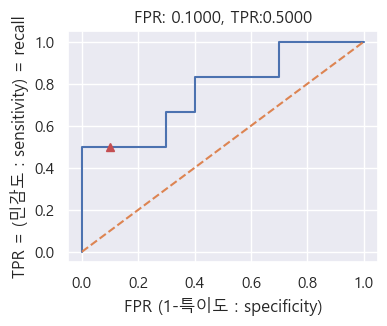

In [108]:
#---------------------------------------------------------------
fpr, tpr, th = roc_curve(y_test, proba_c1)
print(fpr.shape, tpr.shape, th.shape)
#---------------------------------------------------------------

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.plot(FPR, TPR_recall, "r^")

plt.title("ROC curv")
plt.xlabel("FPR (1-특이도 : specificity)")
plt.ylabel("TPR = (민감도 : sensitivity) = recall")
plt.title(f"FPR: {FPR:.4f}, TPR:{TPR_recall:.4f}")
plt.show()

## precision_recall_curve() vs. roc_curve()

X = 확률 변수  
y = 확률


* precision_recall_curve()
<img src="https://blog.kakaocdn.net/dn/buhibz/btruXTZyiS2/zWnjxw6rYXNq9mqbA6sLY0/img.gif">

[좌측 그림]
- FPR, TPR이 최대치가 된다.
- 임계치가 왼쪽(작아진다)으로 간다 : FPR, TPR 둘 다 높다
 
  
[좌측 그림]
- 임계치가 우측에 가깝다.
 = 임계치가 최소화 == positive(양성) 확률이 커진다.
 = 임계치가 0 == 모든 데이터가 양성(p) == TPR이 100 == 틀릴 일이 없다.
 
 
   
* roc_curve()
<img src="https://blog.kakaocdn.net/dn/bmtSzI/btru2wV4yw0/28T7KjpCoYo46X14FteAr1/img.gif">

- 분류가 잘 되면 겹치는 경계선이 거의 없어진다.
- 두 개 집단의 분류가 잘 된다는 것은 roc 커브의 값이 커진다는 것이다.
- auc 점수 최대화